# Credit Card Fraud Detection

This notebook demonstrates how to detect credit card fraud using various machine learning algorithms and a deep learning model. The dataset used is highly imbalanced, which is a common challenge in fraud detection tasks. We will preprocess the data, handle class imbalance, and compare the performance of different models.

## 1. Importing Libraries

First, we need to import the necessary libraries for data manipulation, visualization, and model building.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import os
import matplotlib.pyplot as plt 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
import joblib
from tqdm import tqdm

# For Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


## 2. Data Loading and Exploration

We will load the dataset and perform an initial exploration to understand its structure and the distribution of classes.


In [3]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

# Display the first few rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Set the option to display numbers in integer format
pd.set_option('display.float_format', lambda x: '%.0f' % x)

# Display summary statistics of the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,...,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807
mean,94814,0,0,-0,0,-0,0,-0,-0,-0,...,0,0,0,0,0,0,-0,-0,88,0
std,47488,2,2,2,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,250,0
min,0,-56,-73,-48,-6,-114,-26,-44,-73,-13,...,-35,-11,-45,-3,-10,-3,-23,-15,0,0
25%,54202,-1,-1,-1,-1,-1,-1,-1,-0,-1,...,-0,-1,-0,-0,-0,-0,-0,-0,6,0
50%,84692,0,0,0,-0,-0,-0,0,0,-0,...,-0,0,-0,0,0,-0,0,0,22,0
75%,139320,1,1,1,1,1,0,1,0,1,...,0,1,0,0,0,0,0,0,77,0
max,172792,2,22,9,17,35,73,121,20,16,...,27,11,23,5,8,4,32,34,25691,1


The data is highly imbalanced, as we can see from the class distribution.

In [6]:
# Display the class distribution
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
df.shape 

(284807, 31)

## 3. Data Preprocessing

Next, we will scale the 'Time' and 'Amount' columns using `StandardScaler`.


In [8]:
# Scale the 'Time' and 'Amount' columns
column_to_be_scale = ['Time','Amount']
scaler = StandardScaler()
scale_column = df[column_to_be_scale]

scaled_data = scaler.fit_transform(scale_column)

scaled_df = pd.DataFrame(scaled_data, columns=column_to_be_scale)

df[column_to_be_scale] = scaled_df


## 4. Handling Imbalanced Data

We will handle the class imbalance using SMOTE (Synthetic Minority Over-sampling Technique).


In [9]:
# Define features and target variable
x = df.drop('Class',axis=1)
y = df[['Class']]

In [10]:
# Handle class imbalance using SMOTE
oversample=SMOTE()
X,Y=oversample.fit_resample(x,y)

# Display the new class distribution
Y.value_counts()

Class
0        284315
1        284315
dtype: int64

## 5. Train-Test Split

We will split the data into training and testing sets.


In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

## 6. Model Building

We will define multiple machine learning algorithms to compare their performance.


In [12]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from xgboost import XGBClassifier


In [13]:
xgbc = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
lg   = LogisticRegression()
dt   = DecisionTreeClassifier()
rdf  = RandomForestClassifier()
adb  = AdaBoostClassifier()
knn  = KNeighborsClassifier()

In [14]:
ml_algorithms = {
    xgbc:"XGB Classifier",
    lg:"Logistic Regression",
    dt:"Decision Tree",
    rdf:"Random Forest Classifier",
    adb:"AdaBoost Classifier Model",
    knn:"KNN"
}

## 7. Model Training and Evaluation

We will train the models and evaluate their performance.


In [15]:
# Function to train the model
def train_model(train_data,test_data,models):
    train_history  = {"Algorithm":[],"Train_score":[],"Test_score":[],"Difference":[]}
    for model in tqdm(models.keys()):
        print(f"{models[model]} model training started!")

        # Training the model
        model.fit(train_data[0],train_data[1])

        # Getting Training and Testing score
        train_score = round(model.score(train_data[0],train_data[1]),6)*100
        test_score = round(model.score(test_data[0],test_data[1]),6)*100

        train_history['Algorithm'].append(model.__class__.__name__)
        train_history['Train_score'].append(train_score)
        train_history['Test_score'].append(test_score)
        train_history['Difference'].append(train_score - test_score)

        # Saving the model
        cwd = os.getcwd()
        model_dir = os.path.join(cwd,'models')
        os.makedirs(model_dir, exist_ok=True)
        joblib.dump(model,os.path.join(model_dir,model.__class__.__name__)+'.lb')
        print(f"{models[model]} has been trained and saved successfully!\n")

    return train_history

In [32]:
# Data to be used to train the machine learning algorithms
train_data = (x_train,y_train)
test_data = (x_test,y_test)

# Train the models and get training history

train_history = pd.DataFrame(train_model(train_data,test_data,ml_algorithms))
train_history

  0%|          | 0/6 [00:00<?, ?it/s]

XGB Classifier model training started!


 17%|█▋        | 1/6 [00:06<00:31,  6.30s/it]

XGB Classifier has been trained and saved successfully!

Logistic Regression model training started!


 33%|███▎      | 2/6 [00:09<00:18,  4.60s/it]

Logistic Regression has been trained and saved successfully!

Decision Tree model training started!


 50%|█████     | 3/6 [01:07<01:26, 28.82s/it]

Decision Tree has been trained and saved successfully!

Random Forest Classifier model training started!


 67%|██████▋   | 4/6 [09:57<07:33, 226.69s/it]

Random Forest Classifier has been trained and saved successfully!

AdaBoost Classifier Model model training started!


 83%|████████▎ | 5/6 [13:22<03:38, 218.94s/it]

AdaBoost Classifier Model has been trained and saved successfully!

KNN model training started!


100%|██████████| 6/6 [1:53:21<00:00, 1133.58s/it]

KNN has been trained and saved successfully!



,Algorithm,Train_score,Test_score,Difference
0,XGBClassifier,100,100,0
1,LogisticRegression,95,95,-0
2,DecisionTreeClassifier,100,100,0
3,RandomForestClassifier,100,100,0
4,AdaBoostClassifier,96,96,0
5,KNeighborsClassifier,100,100,0


### Visualization of Model Performance

We will visualize the performance of each model using bar plots.


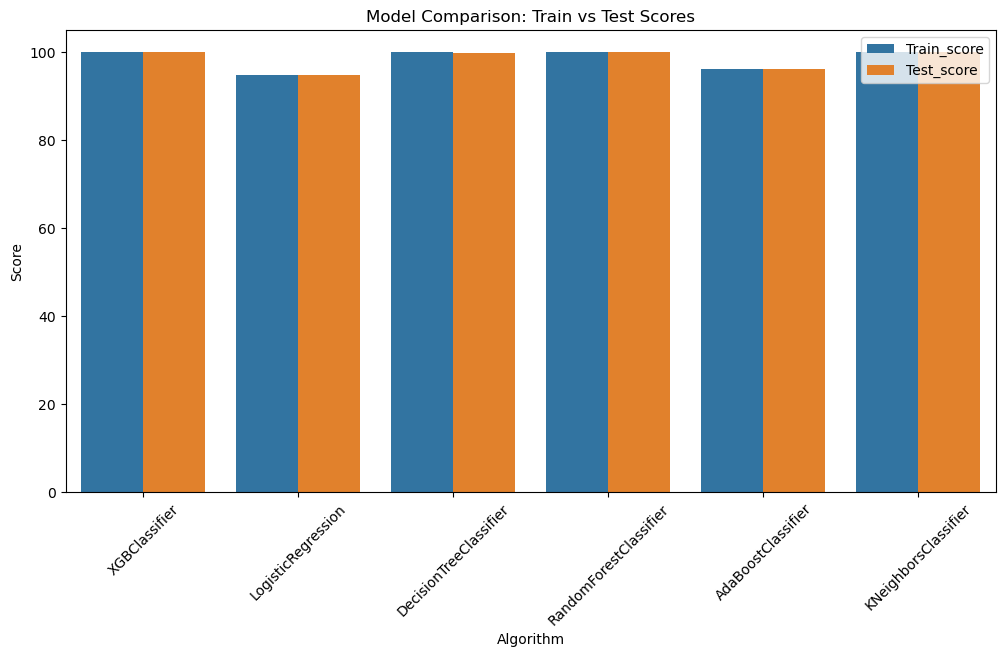

In [55]:
plt.figure(figsize=(12, 6))
train_scores = train_history.melt(id_vars='Algorithm', value_vars=['Train_score', 'Test_score'], var_name='Score Type', value_name='Score')
sns.barplot(x='Algorithm', y='Score', hue='Score Type', data=train_scores)
plt.title('Model Comparison: Train vs Test Scores')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## 8. Using Deep Learning Algorithms

Next, we will use a deep learning model to classify the data.


In [72]:
# Scale the data

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(x_train)
X_test_transformed = scaler.transform(x_test)

In [73]:
# Initialize the ANN model
model = Sequential()

# Add the input layer and the first hidden layer with batch normalization and dropout
model.add(Dense(units=64, activation='relu', input_dim=X_train_transformed.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Add the second hidden layer
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Add the third hidden layer
model.add(Dense(units=16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with Adam optimizer and learning rate decay
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,057 (19.75 KB)

 Trainable params: 4,833 (18.88 KB)

 Non-trainable params: 224 (896.00 B)

In [74]:
# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

callbacks = [early_stopping, reduce_lr]


In [75]:
# Train the model
history = model.fit(X_train_transformed, y_train, validation_split=0.2, epochs=25, batch_size=32, callbacks=callbacks, verbose=1)


Epoch 1/25
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step - accuracy: 0.9075 - loss: 0.2418 - val_accuracy: 0.9810 - val_loss: 0.0597 - learning_rate: 0.0010
Epoch 2/25
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.9615 - loss: 0.1169 - val_accuracy: 0.9858 - val_loss: 0.0448 - learning_rate: 0.0010
Epoch 3/25
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 56s 5ms/step - accuracy: 0.9688 - loss: 0.0984 - val_accuracy: 0.9895 - val_loss: 0.0350 - learning_rate: 0.0010
Epoch 4/25
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 54s 5ms/step - accuracy: 0.9738 - loss: 0.0837 - val_accuracy: 0.9919 - val_loss: 0.0271 - learning_rate: 0.0010
Epoch 5/25
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 54s 5ms/step - accuracy: 0.9765 - loss: 0.0735 - val_accuracy: 0.9896 - val_loss: 0.0296 - learning_rate: 0.0010
Epoch 6/25
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - accuracy: 0.9795 - loss: 0.0646 - val_accuracy: 0.9939 - val_loss: 0.0222 - learning_rate: 0.0010
Epoch 7/25
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step -

In [76]:
# Make predictions on the test set
y_pred = (model.predict(X_test_transformed) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
Accuracy: 99.89%


In [77]:
# Saving the curent model
cwd = os.getcwd()
model_dir = os.path.join(cwd,'models')
os.makedirs(model_dir, exist_ok=True)
model.save(os.path.join(model_dir,'ANN_Model')+'.h5')
print("The model has been saved successfully!\n")

The model has been saved successfully!



### Visualization of Deep Learning Model Performance

We will visualize the accuracy and loss over epochs.


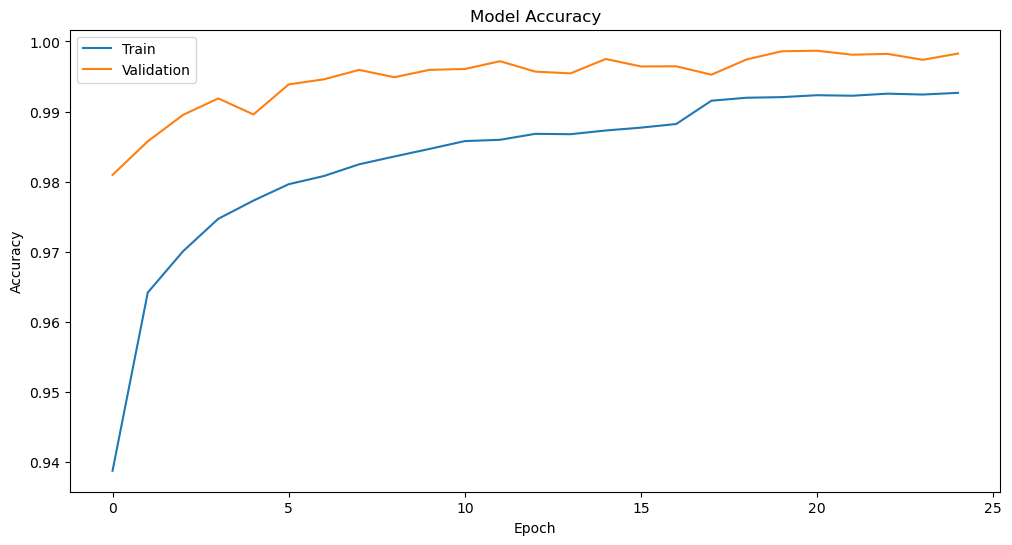

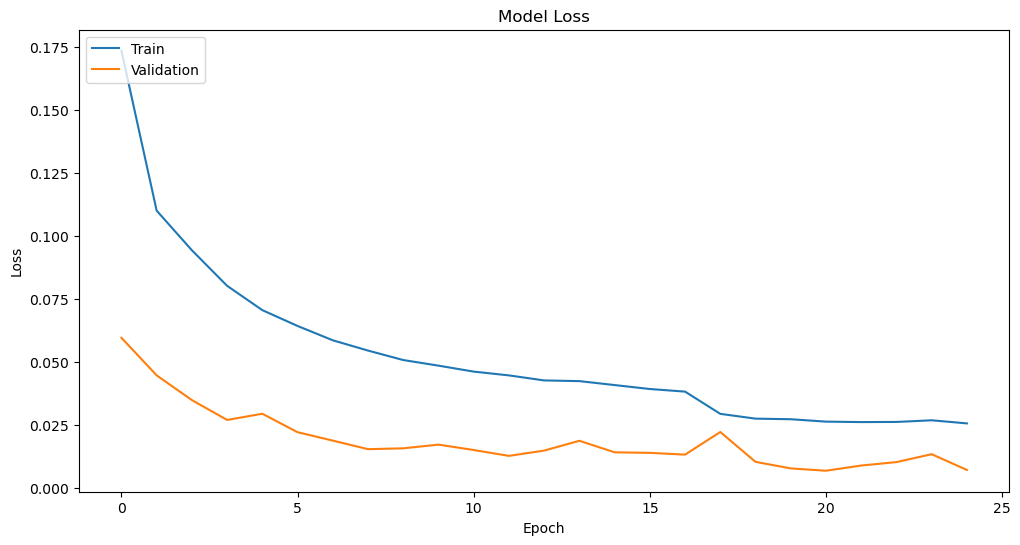

In [78]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## 9. Comparision and Evaluation

Now, we will make predictions using the loaded models, plot confusion matrices, and print classification reports.

In [79]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, r2_score

In [80]:
def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    return 1 - (1 - r2) * (n - 1) / (n - n_features - 1)

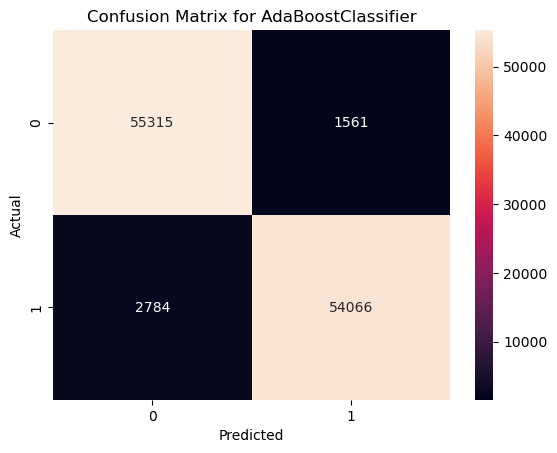

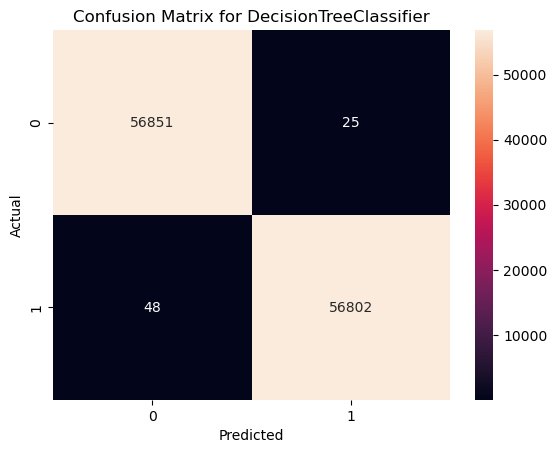

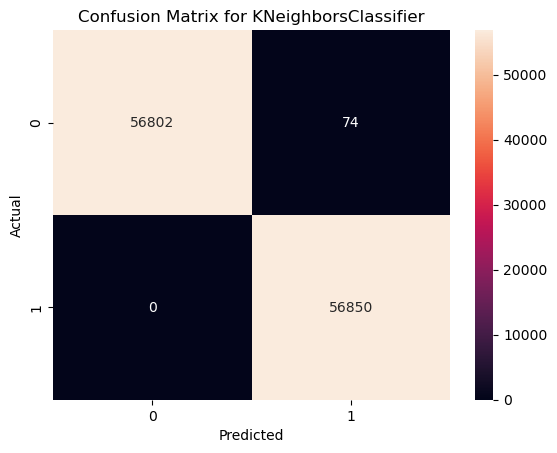

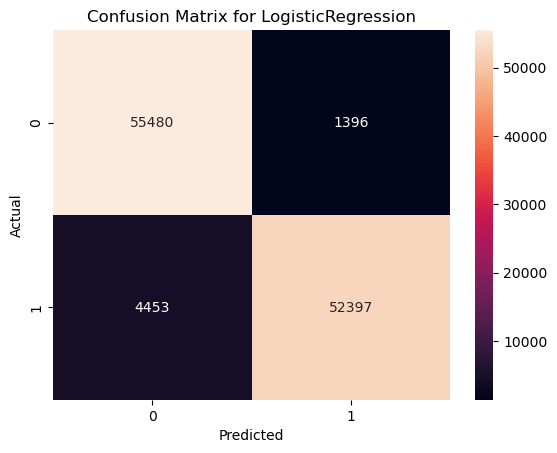

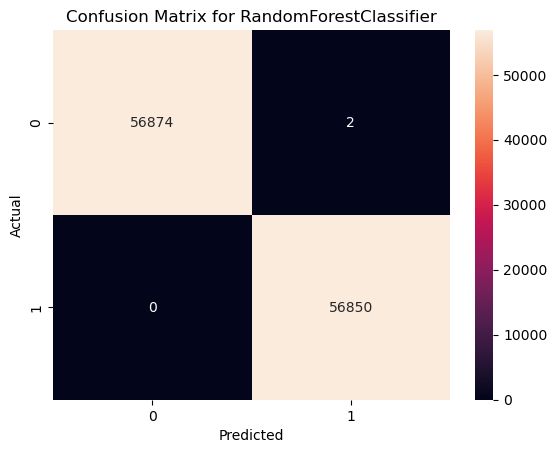

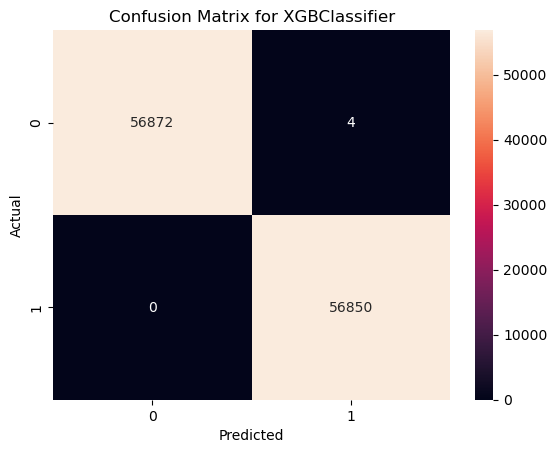

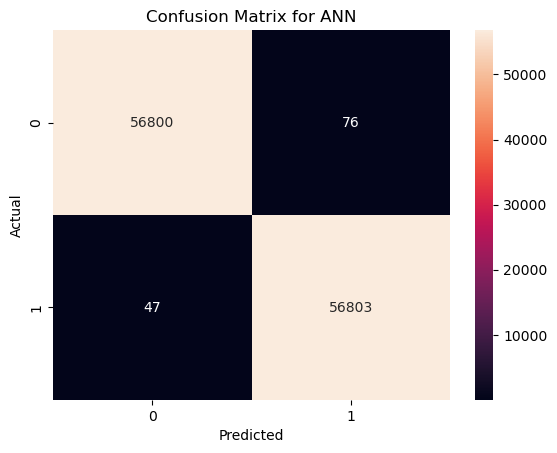

{'Algorithm': ['AdaBoostClassifier', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'RandomForestClassifier', 'XGBClassifier', 'ANN_Model'], 'Precision': [0.9719380876193215, 0.9995600682774034, 0.9987000210807392, 0.9740486680423104, 0.9999648209385773, 0.9999296443522003, 0.9999296443522003], 'Recall': [0.9510290237467018, 0.999155672823219, 1.0, 0.9216710642040458, 1.0, 1.0, 1.0], 'f1_score': [0.9613698800643686, 0.9993578296401207, 0.9993495877792816, 0.9471362851694187, 0.9999824101598915, 0.9999648209385773, 0.9999648209385773], 'Adjusted r2_score ': [0.8471362145658226, 0.9974317476785513, 0.9973965661399011, 0.7942231804362476, 0.9999296369227, 0.9998592738454001, 0.9998592738454001]}


,Algorithm,Precision,Recall,f1_score,Adjusted r2_score
0,AdaBoostClassifier,0.97193809,0.95102902,0.96136988,0.84713621
1,DecisionTreeClassifier,0.99956007,0.99915567,0.99935783,0.99743175
2,KNeighborsClassifier,0.99870002,1.00000000,0.99934959,0.99739657
3,LogisticRegression,0.97404867,0.92167106,0.94713629,0.79422318
4,RandomForestClassifier,0.99996482,1.00000000,0.99998241,0.99992964
5,XGBClassifier,0.99992964,1.00000000,0.99996482,0.99985927
6,ANN_Model,0.99992964,1.00000000,0.99996482,0.99985927


In [82]:
results = {"Algorithm":[],"Precision":[],"Recall":[],"f1_score":[],"Adjusted r2_score ":[]}

models = os.listdir(model_dir)
ml_models = [file for file in models if file.endswith('.lb')]

# For Machine Learning Models
for model_name in ml_models:
    model = joblib.load(os.path.join(model_dir, model_name))
    prediction = model.predict(x_test)
    matrix = confusion_matrix(y_test, prediction)

    sns.heatmap(matrix, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Calculate precision, recall, F1 score manually
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    adj_r2 = adjusted_r2_score(y_test, prediction, x_test.shape[1])

    results['Algorithm'].append(model.__class__.__name__)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['f1_score'].append(f1)
    results["Adjusted r2_score "].append(adj_r2)


# For Deep Learning Models
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d')
plt.title('Confusion Matrix for ANN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate precision, recall, F1 score manually
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
adj_r2 = adjusted_r2_score(y_test, prediction, x_test.shape[1])

results['Algorithm'].append("ANN_Model")
results['Precision'].append(precision)
results['Recall'].append(recall)
results['f1_score'].append(f1)
results["Adjusted r2_score "].append(adj_r2)

# Convert results to a DataFrame for easy viewing
print(results)
results_df = pd.DataFrame(results, dtype=np.float64)

# Set precision display for the DataFrame
pd.set_option('display.float_format', '{:.8f}'.format)
results_df


In [133]:
import os
import joblib
import pandas as pd
from datetime import datetime
from tensorflow.keras.models import load_model

model_dir = os.path.join(os.getcwd(), 'models')

def make_prediction(inputs, model_name='DecisionTreeClassifier'):
    # Load the model based on model_name
    if model_name == 'DecisionTreeClassifier':
        model_path = os.path.join(model_dir, 'DecisionTreeClassifier.lb')  
    elif(model_name == 'ANN_Model'):
        model_path = os.path.join(model_dir, f'{model_name}.h5') 
    else:
        model_path = os.path.join(model_dir, f'{model_name}.lb') 

    if model_path.endswith('.lb'):
        try:
            model = joblib.load(model_path)
        except FileNotFoundError:
            print("Enter the correct model name!")
            return None
    else:
        try:
            model = load_model(model_path)
        except:
            print("Enter correct model name!")
            return None


    columns = ['Time'] + [f'V{i}' for i in range(1, 29)] + ['Amount']

    if not isinstance(inputs[0], list):
        inputs = [inputs]
    
    # Convert inputs to a DataFrame
    df_inputs = pd.DataFrame(inputs, columns=columns)
    
    # Predict for each set of inputs
    predictions = (model.predict(df_inputs)>0.5).astype("int32")

    # Add predictions to the DataFrame
    df_inputs['Prediction'] = predictions

    # Ensure the predictions directory exists
    prediction_dir = os.path.join(os.getcwd(), 'Predictions')
    os.makedirs(prediction_dir, exist_ok=True)

    # Save inputs and predictions to CSV file
    timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
    save_filename = f'{timestamp}.csv'
    save_path = os.path.join(prediction_dir, save_filename)
    df_inputs.to_csv(save_path, index=False)

    # Return the DataFrame
    return df_inputs


In [136]:
# Example inputs
inputs = [
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
]

prediction = make_prediction(inputs,model_name='XGBClassifier')
prediction

[0]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Prediction
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [137]:
# Example inputs
inputs = [
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2],
    [3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
]

prediction = make_prediction(inputs,model_name='ANN_Model')
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
[[0]
 [0]
 [0]]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Prediction
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,0


## 9. Conclusion

In this notebook, we compared multiple machine learning models and a deep learning model to detect credit card fraud. We handled the class imbalance using SMOTE and evaluated the models based on accuracy. The results show that the Random Forest Classifier and the deep learning model achieved high accuracy. Further tuning of hyperparameters and feature
